In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [284]:
df2 = pd.read_csv('./data/test.csv')

In [285]:
df2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [277]:
df1 = pd.read_csv('./data/train.csv')

In [278]:
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [235]:
df1 = df1.drop('Survived',axis=1)
df1.shape,df2.shape

((891, 11), (418, 11))

In [236]:
df = df1.append(df2)
df.shape

(1309, 11)

In [237]:
df.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [238]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [239]:
df.Age.isna().sum(),df.Fare.isna().sum(),df.Embarked.isna().sum(),df.Cabin.isna().sum()

# Impute- Age, Fare and Embarked values, Drop Cabin as the Fare should cover this feature. 

(263, 1, 2, 1014)

# Age

In [248]:
df['Age'].isnull().sum()

263

In [249]:
df_t = df.groupby('title')['Age'].agg(['mean','median'])
df_t.head(3)
df_t.columns
lst1 = df_t.index
lst2 = df_t['mean']

In [250]:
di = dict(zip(lst1,lst2))
di

{' Capt': 70.0,
 ' Col': 54.0,
 ' Don': 40.0,
 ' Dona': 39.0,
 ' Dr': 43.57142857142857,
 ' Jonkheer': 38.0,
 ' Lady': 48.0,
 ' Major': 48.5,
 ' Master': 5.482641509433963,
 ' Miss': 21.774238095238097,
 ' Mlle': 24.0,
 ' Mme': 24.0,
 ' Mr': 32.25215146299484,
 ' Mrs': 36.99411764705882,
 ' Ms': 28.0,
 ' Rev': 41.25,
 ' Sir': 49.0,
 ' the Countess': 33.0}

In [251]:
mask = df.Age.isnull()

In [252]:
df.loc[mask, 'Age'] = df.loc[mask, 'title'].map(di)
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [253]:
df['Age'].isnull().sum()

0

In [254]:
# df[df['Survived']== 0].hist(column='Age',color='red',
#                             bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
# df[df['Survived']== 1].hist(column='Age',color='green',
#                             bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
# plt.figure(figsize=(20,7))

# Name

In [240]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [241]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen


In [242]:
df['title']=df['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [243]:
df['title'].nunique(),df['surname'].nunique()

(18, 875)

In [244]:
df['title'].isnull().any(),df['surname'].isnull().any()

(False, False)

In [245]:
# df11 = df.groupby("title")['Survived'].value_counts(normalize=True).unstack()
# df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True',legend=False)
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.show()

In [246]:
df.groupby('title').title.count()

title
 Capt              1
 Col               4
 Don               1
 Dona              1
 Dr                8
 Jonkheer          1
 Lady              1
 Major             2
 Master           61
 Miss            260
 Mlle              2
 Mme               1
 Mr              757
 Mrs             197
 Ms                2
 Rev               8
 Sir               1
 the Countess      1
Name: title, dtype: int64

In [247]:
df['surname'].nunique(),df['surname'].count()

(875, 1309)

#  Ticket

In [107]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr


In [108]:
df['Ticket_1'] = df['Ticket'].apply(lambda x: x.split(' ')[-1])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr,240276


In [109]:
df['Ticket_1'] = pd.to_numeric(df['Ticket_1'],errors='coerce')
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr,330911.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,363272.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr,240276.0


In [110]:
df['Ticket_1'].isna().sum()

4

In [111]:
print(df[df['Ticket_1'].isnull()])

     PassengerId  Pclass                             Name   Sex   Age  SibSp  \
179          180       3              Leonard, Mr. Lionel  male  36.0      0   
271          272       3     Tornquist, Mr. William Henry  male  25.0      0   
302          303       3  Johnson, Mr. William Cahoone Jr  male  19.0      0   
597          598       3              Johnson, Mr. Alfred  male  49.0      0   

     Parch Ticket  Fare Cabin Embarked    surname title  Ticket_1  
179      0   LINE   0.0   NaN        S    Leonard    Mr       NaN  
271      0   LINE   0.0   NaN        S  Tornquist    Mr       NaN  
302      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  
597      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  


In [112]:
df.loc[[179,271,302,597]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.000000,0,2,PC 17756,83.1583,E45,C,Compton,Mrs,17756.0
179,180,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0000,NaN,S,Leonard,Mr,NaN
271,1163,3,"Fox, Mr. Patrick",male,32.252151,0,0,368573,7.7500,NaN,Q,Fox,Mr,368573.0
271,272,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,NaN,S,Tornquist,Mr,NaN
302,1194,2,"Phillips, Mr. Escott Robert",male,43.000000,0,1,S.O./P.P. 2,21.0000,NaN,S,Phillips,Mr,2.0
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S,Johnson,Mr,NaN
597,598,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0000,NaN,S,Johnson,Mr,NaN


In [113]:
df['Ticket_1'].value_counts().argmax(),df['Ticket_1'].value_counts().sort_values(ascending=False)

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


(2343.0, 2343.0      11
 2144.0       8
 1601.0       8
 17608.0      7
 347082.0     7
             ..
 248726.0     1
 28134.0      1
 392092.0     1
 2687.0       1
 3536.0       1
 Name: Ticket_1, Length: 923, dtype: int64)

In [114]:
df['Ticket_1'] = df['Ticket_1'].fillna(1601)
df['Ticket_1'].isna().sum()

0

In [115]:
df['Embarked'].isnull().sum()

2

In [116]:
df['Cabin'].nunique(),df['Cabin'].count(),df['Cabin'].isna().sum(),df.shape

(186, 295, 1014, (1309, 14))

In [117]:
df['Ticket_2'] = df['Ticket'].str.extract('(\D{2})',expand=True) 
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1,Ticket_2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr,330911.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,363272.0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr,240276.0,NaN


In [118]:
df['Ticket_2'].unique()

array([nan, 'A/', 'W.', 'SC', 'ST', 'PC', 'C ', 'C.', 'SO', 'F.', 'A.',
       'PP', 'CA', 'S.', 'AQ', 'LP', '. ', 'Fa', 'LI', 'W/', 'SW', 'P/',
       'WE'], dtype=object)

In [120]:
# df.groupby('Ticket_2')['Survived'].value_counts().unstack()

In [ ]:
#  drop Tciket,Ticket_1 & Ticket_2

#  Cabin

In [414]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_1         object
surname         object
title           object
Ticket_1       float64
dtype: object

In [415]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1,surname,title,Ticket_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Braund,Mr,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Cumings,Mrs,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Heikkinen,Miss,3101282.0


In [416]:
import re
# df['Cabin_1'] = df['Cabin'].apply(lambda x: x.split()[0])
df['Cabin_1'] = df['Cabin'].str.extract('(\w{1})', expand=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1,surname,title,Ticket_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Braund,Mr,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Cumings,Mrs,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Heikkinen,Miss,3101282.0


In [417]:
df.groupby('Cabin_1')['Fare'].size()

Cabin_1
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Fare, dtype: int64

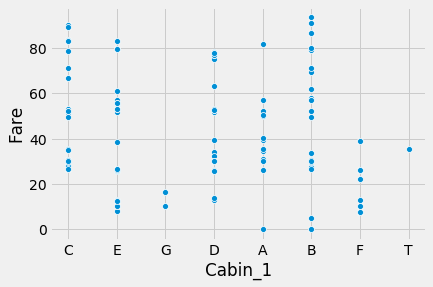

In [420]:
sns.scatterplot(y='Fare',x='Cabin_1',data=df[df['Fare']<100])

In [ ]:
#  drop Cabin as Fare should cover this feature

#  Embarked

In [255]:
print(df[df['Embarked'].isnull()])

     PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked surname  title  
61   38.0      0      0  113572  80.0   B28      NaN   Icard   Miss  
829  62.0      0      0  113572  80.0   B28      NaN   Stone    Mrs  


In [256]:
# df[df['Survived']==0].groupby('Embarked')['Survived'].count()

In [257]:
# df[df['Survived']==1].groupby('Embarked')['Survived'].count()

In [258]:
# Since both passengers missing values for Embarked has survived, assign C as high survival rate. 

In [259]:
df['Embarked'] = df['Embarked'].fillna('C')

In [260]:
df['Embarked'].isna().sum()

0

In [261]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [262]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
surname         object
title           object
dtype: object

In [264]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'surname', 'title'],
      dtype='object')

# drop columns and scale/encode

In [ ]:
#  drop - ['PassengerId', 'Name', 'Ticket', 'Cabin', 'surname']

In [266]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [267]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'surname'],axis=1)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss


In [268]:
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')],axis=1)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = pd.concat([df,pd.get_dummies(df['title'], prefix='title')],axis=1)
df = df.drop(['Embarked','title'],axis=1)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [269]:
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [270]:
df = pd.concat([df,pd.get_dummies(df['Pclass'], prefix='Pclass')],axis=1)
df = df.drop('Pclass',axis=1)
df.head(3)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,title_ Col,...,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [271]:
df.head(3)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,title_ Col,...,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#  Fare

In [272]:
df['Fare'].isnull().sum()

1

In [273]:
df['Fare'] = df['Fare'].ffill()

In [274]:
df.isnull().any()

Sex                    False
Age                    False
SibSp                  False
Parch                  False
Fare                   False
Embarked_C             False
Embarked_Q             False
Embarked_S             False
title_ Capt            False
title_ Col             False
title_ Don             False
title_ Dona            False
title_ Dr              False
title_ Jonkheer        False
title_ Lady            False
title_ Major           False
title_ Master          False
title_ Miss            False
title_ Mlle            False
title_ Mme             False
title_ Mr              False
title_ Mrs             False
title_ Ms              False
title_ Rev             False
title_ Sir             False
title_ the Countess    False
Pclass_1               False
Pclass_2               False
Pclass_3               False
dtype: bool

# GDBoost 

In [279]:
df1.shape,df.shape

((891, 12), (1309, 29))

In [280]:
# Separate out the target

x_train = df[:891]
y_train = df1['Survived']
x_test = df[891:]

x_train.shape,y_train.shape,x_test.shape

((891, 29), (891,), (418, 29))

In [281]:
x_train.isnull().any(),x_test.isnull().any()

(Sex                    False
 Age                    False
 SibSp                  False
 Parch                  False
 Fare                   False
 Embarked_C             False
 Embarked_Q             False
 Embarked_S             False
 title_ Capt            False
 title_ Col             False
 title_ Don             False
 title_ Dona            False
 title_ Dr              False
 title_ Jonkheer        False
 title_ Lady            False
 title_ Major           False
 title_ Master          False
 title_ Miss            False
 title_ Mlle            False
 title_ Mme             False
 title_ Mr              False
 title_ Mrs             False
 title_ Ms              False
 title_ Rev             False
 title_ Sir             False
 title_ the Countess    False
 Pclass_1               False
 Pclass_2               False
 Pclass_3               False
 dtype: bool, Sex                    False
 Age                    False
 SibSp                  False
 Parch                  Fal

In [282]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.25,
                                     max_depth=20, random_state=42, max_leaf_nodes=50)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

In [283]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [286]:
df2['Survived'] = predictions
df2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1


In [288]:
pred = df2.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
pred.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [298]:
pred = pred.set_index('PassengerId')

In [299]:
pred.head(3)

,Survived
PassengerId,
892,0
893,0
894,1


In [300]:
write1 = pred.to_csv('./data/pred1.csv')

In [301]:
test1 = pd.read_csv('./data/pred1.csv',index_col=0)

In [302]:
test1.head(3)

,Survived
PassengerId,
892,0
893,0
894,1


In [303]:
test1.shape

(418, 1)